# Analysis
- Temperatures get warmer the closer to the equator (0 Lat) you get. Further away the temperatures decrease. This makes sense since many of the tropical areas tend to be near the equator.
- There does not appear to be a correlation between cloudiness and latitude.
- There does not appear to be a strong correlation between humidity and latitude, however the northern hemisphere appears to be more humid than the southern hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)

city_count = len(cities)
#cities

In [3]:
#Import URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
query_url = url + cities[0] + "&units=imperial&APPID=" + api_key
query_url

'http://api.openweathermap.org/data/2.5/weather?q=mataura&units=imperial&APPID=7f2b61751465827b7179742b3f3214a8'

In [4]:
# #create city DATAFRAME        
city_df = pd.DataFrame(columns=['city', 'cloudiness', 'country', 'date', 'humidity', 'lat', 'lon', 'max_temp', 'wind_speed'])



In [5]:
#create loop to gather information for dataframe from the api
counter = 0
for city in cities:
   city1 = city.replace(' ','%20')
   query_url = url + city1 + "&units=imperial&APPID=" + api_key
   counter = counter + 1
   weather = []

   try:
       response = requests.get(query_url).json()
       weather = {'city': city,
               'cloudiness': response['clouds']['all'],
               'country': response['sys']['country'],
               'date': response['dt'],
               'humidity': response['main']['humidity'],
               'lat': response['coord']['lat'],
               'lon': response['coord']['lon'],
               'max_temp': response['main']['temp'],
               'wind_speed': response['wind']['speed']}
       print(f"Processing Record {counter} of {city_count} || {city}. ")
       city_df = city_df.append(weather, ignore_index=True)
   except (KeyError, IndexError):
       print(f"Missing field/result... skipping {city}.")

Processing Record 1 of 603 || mataura. 
Processing Record 2 of 603 || mar del plata. 
Processing Record 3 of 603 || klaksvik. 
Processing Record 4 of 603 || evensk. 
Processing Record 5 of 603 || ushuaia. 
Processing Record 6 of 603 || sao joao da barra. 
Processing Record 7 of 603 || nan. 
Processing Record 8 of 603 || muswellbrook. 
Processing Record 9 of 603 || falmouth. 
Processing Record 10 of 603 || cape town. 
Missing field/result... skipping sentyabrskiy.
Processing Record 12 of 603 || thompson. 
Missing field/result... skipping barbar.
Processing Record 14 of 603 || bubaque. 
Processing Record 15 of 603 || yuyao. 
Processing Record 16 of 603 || coquimbo. 
Processing Record 17 of 603 || tiksi. 
Processing Record 18 of 603 || avarua. 
Processing Record 19 of 603 || puerto ayora. 
Processing Record 20 of 603 || farap. 
Processing Record 21 of 603 || atuona. 
Processing Record 22 of 603 || rikitea. 
Processing Record 23 of 603 || butaritari. 
Processing Record 24 of 603 || chuy. 


Processing Record 193 of 603 || bereda. 
Processing Record 194 of 603 || alice springs. 
Processing Record 195 of 603 || teruel. 
Processing Record 196 of 603 || brae. 
Processing Record 197 of 603 || winslow. 
Processing Record 198 of 603 || narsaq. 
Processing Record 199 of 603 || tommot. 
Processing Record 200 of 603 || sooke. 
Processing Record 201 of 603 || ellisras. 
Missing field/result... skipping krasnoselkup.
Processing Record 203 of 603 || puerto leguizamo. 
Processing Record 204 of 603 || codrington. 
Processing Record 205 of 603 || castro. 
Processing Record 206 of 603 || esperance. 
Processing Record 207 of 603 || torbay. 
Processing Record 208 of 603 || mataram. 
Processing Record 209 of 603 || sola. 
Processing Record 210 of 603 || cabo san lucas. 
Processing Record 211 of 603 || pampa. 
Processing Record 212 of 603 || cidreira. 
Processing Record 213 of 603 || isangel. 
Processing Record 214 of 603 || nikolskoye. 
Missing field/result... skipping samusu.
Processing Rec

Processing Record 384 of 603 || yulara. 
Processing Record 385 of 603 || rawlins. 
Processing Record 386 of 603 || arman. 
Processing Record 387 of 603 || nizhniy baskunchak. 
Processing Record 388 of 603 || ciudad bolivar. 
Processing Record 389 of 603 || homer. 
Processing Record 390 of 603 || tucurui. 
Missing field/result... skipping korla.
Processing Record 392 of 603 || flin flon. 
Processing Record 393 of 603 || at-bashi. 
Processing Record 394 of 603 || clarksville. 
Processing Record 395 of 603 || beroroha. 
Processing Record 396 of 603 || port hedland. 
Processing Record 397 of 603 || liwonde. 
Processing Record 398 of 603 || la paz. 
Processing Record 399 of 603 || reinosa. 
Missing field/result... skipping formoso do araguaia.
Processing Record 401 of 603 || filingue. 
Processing Record 402 of 603 || lompoc. 
Processing Record 403 of 603 || grand-lahou. 
Processing Record 404 of 603 || melfi. 
Processing Record 405 of 603 || lasa. 
Missing field/result... skipping chastooze

Processing Record 574 of 603 || tra vinh. 
Processing Record 575 of 603 || izhma. 
Processing Record 576 of 603 || roma. 
Missing field/result... skipping jiddah.
Processing Record 578 of 603 || taft. 
Processing Record 579 of 603 || sao domingos. 
Processing Record 580 of 603 || ruidoso. 
Missing field/result... skipping ijaki.
Processing Record 582 of 603 || xuddur. 
Processing Record 583 of 603 || sao felix do xingu. 
Processing Record 584 of 603 || cuxhaven. 
Processing Record 585 of 603 || port blair. 
Processing Record 586 of 603 || gorno-altaysk. 
Processing Record 587 of 603 || larap. 
Processing Record 588 of 603 || gwadar. 
Processing Record 589 of 603 || slawno. 
Processing Record 590 of 603 || viedma. 
Processing Record 591 of 603 || culaman. 
Processing Record 592 of 603 || garowe. 
Processing Record 593 of 603 || hokitika. 
Processing Record 594 of 603 || kloulklubed. 
Processing Record 595 of 603 || creston. 
Processing Record 596 of 603 || kuching. 
Processing Record 59

In [6]:
#Convert Raw Data to DataFrame
city_df.to_csv("..\\Output\\cities.csv", index=False)


#Display the DataFrame
city_df.head()

,city,cloudiness,country,date,humidity,lat,lon,max_temp,wind_speed
0,mataura,56,NZ,1551142807,45,-46.19,168.86,68,10
1,mar del plata,8,AR,1551142959,55,-46.43,-67.52,56.41,9.22
2,klaksvik,88,FO,1551142200,93,62.23,-6.59,48.2,14.99
3,evensk,68,RU,1551143106,100,61.92,159.24,-6.6,6.2
4,ushuaia,75,AR,1551139200,87,-54.81,-68.31,44.6,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

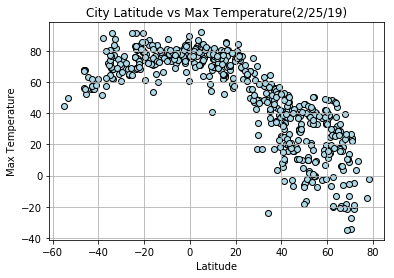

In [7]:
#get axis infomration
x = city_df['lat'].values
y = city_df['max_temp'].values

#add title and axis info
plt.title("City Latitude vs Max Temperature(2/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# plot
plt.scatter(x,y, marker="o", facecolor="lightblue", edgecolors = "black");

#### Latitude vs. Humidity Plot

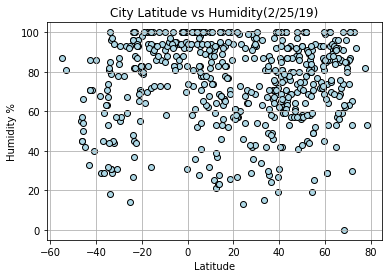

In [11]:
#get axis infomration
x = city_df['lat'].values
y = city_df['humidity'].values

#add title and axis info
plt.title("City Latitude vs Humidity(2/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# plot
plt.scatter(x,y, marker="o", facecolor="lightblue", edgecolors = "black");

#### Latitude vs. Cloudiness Plot

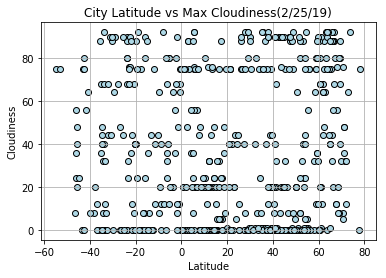

In [9]:
#get axis infomration
x = city_df['lat'].values
y = city_df['cloudiness'].values

#add title and axis info
plt.title("City Latitude vs Max Cloudiness(2/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# plot
plt.scatter(x,y, marker="o", facecolor="lightblue", edgecolors = "black");

#### Latitude vs. Wind Speed Plot

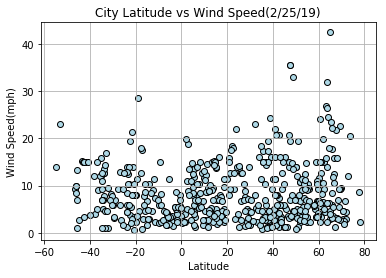

In [10]:
#get axis infomration
x = city_df['lat'].values
y = city_df['wind_speed'].values

#add title and axis info
plt.title("City Latitude vs Wind Speed(2/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(True)

# plot
plt.scatter(x,y, marker="o", facecolor="lightblue", edgecolors = "black");